# House Price Prediction Dataset – Kaggle
Objective Predict the price of a house based on the house features

In [82]:
import pickle
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action="once")
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.compose import make_column_transformer,TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,RobustScaler,Normalizer, StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
# Since there is a lot of deprecation warning, I am going to surpress them with this 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Sourcing

In [83]:
data = pd.read_csv("train.csv")

print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.info()

In [ ]:
[data.isnull().sum()/data.shape[0]]

## Data Cleaning

### Imputing Missing Values

Text(0.5, 1.0, 'Missing Values Heatmap')

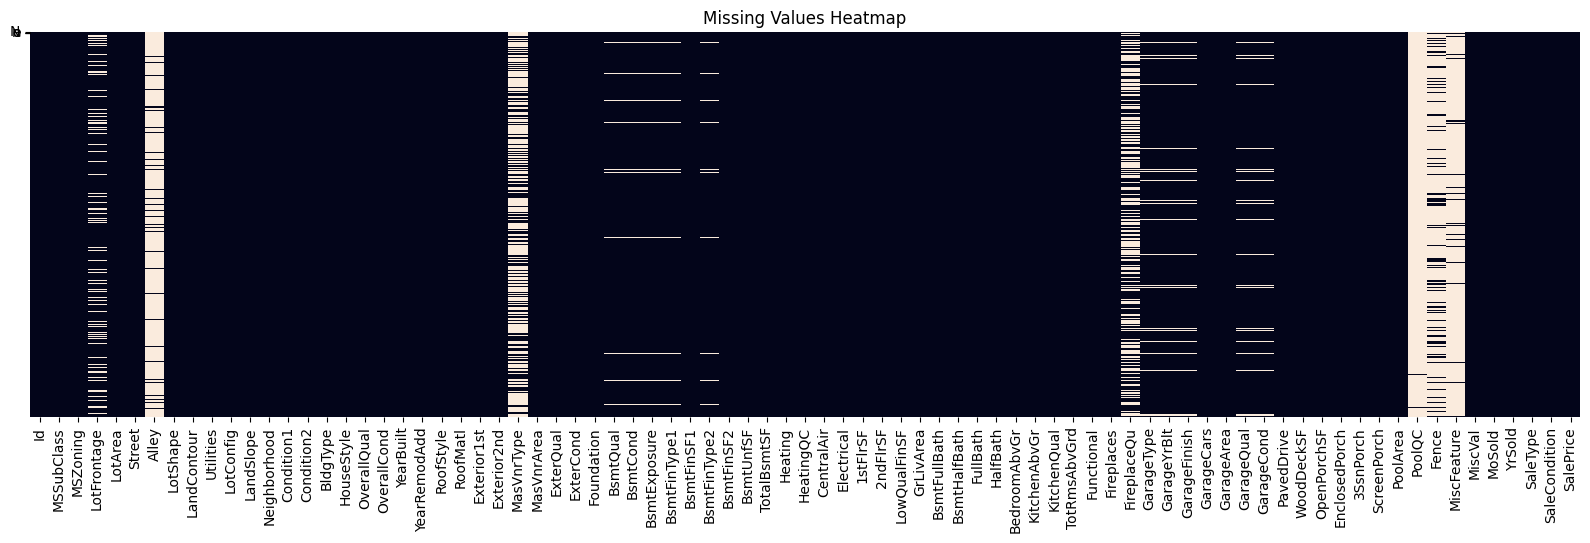

In [8]:
plt.figure(figsize=(20,5))

sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

(1460, 75)


Text(0.5, 1.0, 'Missing Values Heatmap (after Dropping Columns)')

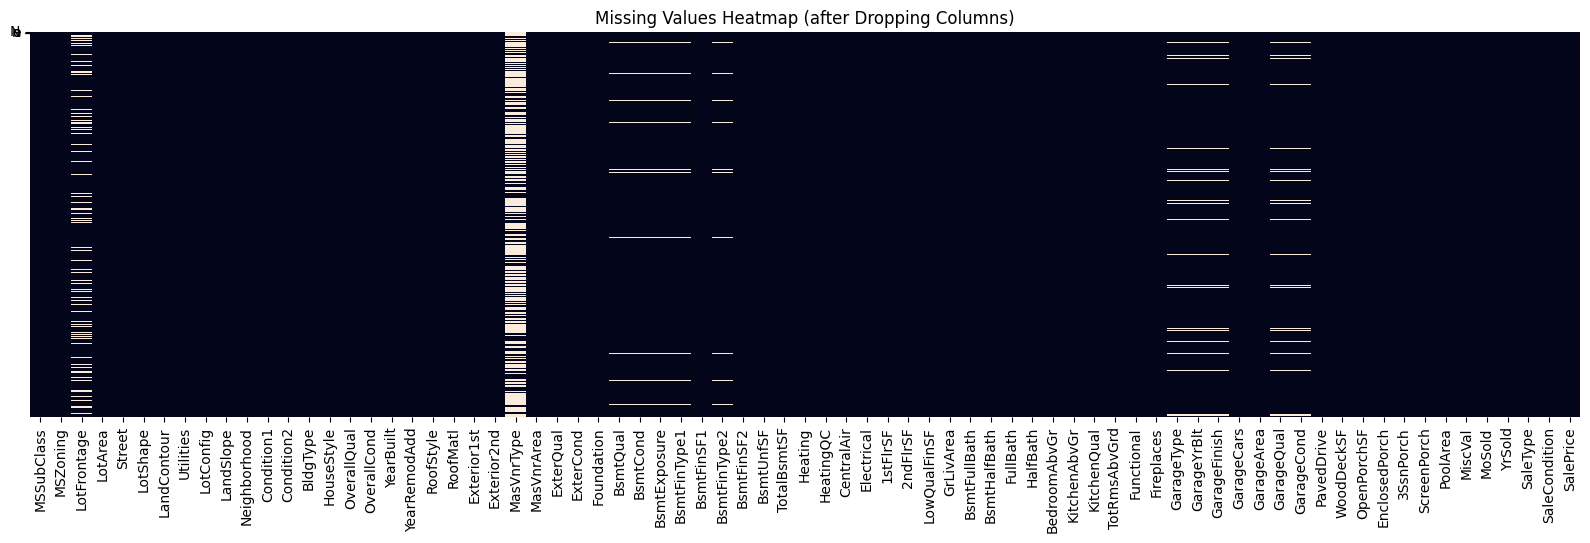

In [7]:
data = data.drop(["Id", "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"], axis=1)
print(data.shape)

plt.figure(figsize=(20,5))

sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap (after Dropping Columns)")

In [8]:
#read feature data dictionary and identify features with ordinal data
ord_data = ["MSSubClass","LotShape","LandContour","LandSlope","OverallQual","OverallCond","ExterQual","ExterCond",
            "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",'Condition1',
 'Condition2',"HeatingQC","KitchenQual","GarageFinish","GarageQual","GarageCond","PavedDrive"]
            
non_ord, cat_data, num_data = list(), list(), list()

for i in data.columns:
    if i not in ord_data:
        non_ord.append(i)


for i in range(len(non_ord)):
    if data[non_ord[i]].dtypes == "object":
        cat_data.append(non_ord[i])
    else:
        num_data.append(non_ord[i])


print("Non-ordinal Features: ", len(non_ord), "Ordinal Features: ", len(ord_data), "Total Features: ", len(ord_data) + len(non_ord))
print("Categorical Features: ", len(cat_data), "Continuous Features: ", len(num_data), "Ordinal Features: ", len(ord_data), "Total Features: ", len(ord_data) + len(cat_data) + len(num_data))

Non-ordinal Features:  54 Ordinal Features:  21 Total Features:  75
Categorical Features:  20 Continuous Features:  34 Ordinal Features:  21 Total Features:  75


In [9]:
fill = dict()

for i in range(len(data.columns)):
    
    if data.columns[i] in num_data:
        fill[data.columns[i]] = data[data.columns[i]].median()
    
    else:
        fill[data.columns[i]] = str(data[data.columns[i]].mode()).split()[1]
        
print(len(fill))

75


Text(0.5, 1.0, 'Missing Values Heatmap (after filling with mode)')

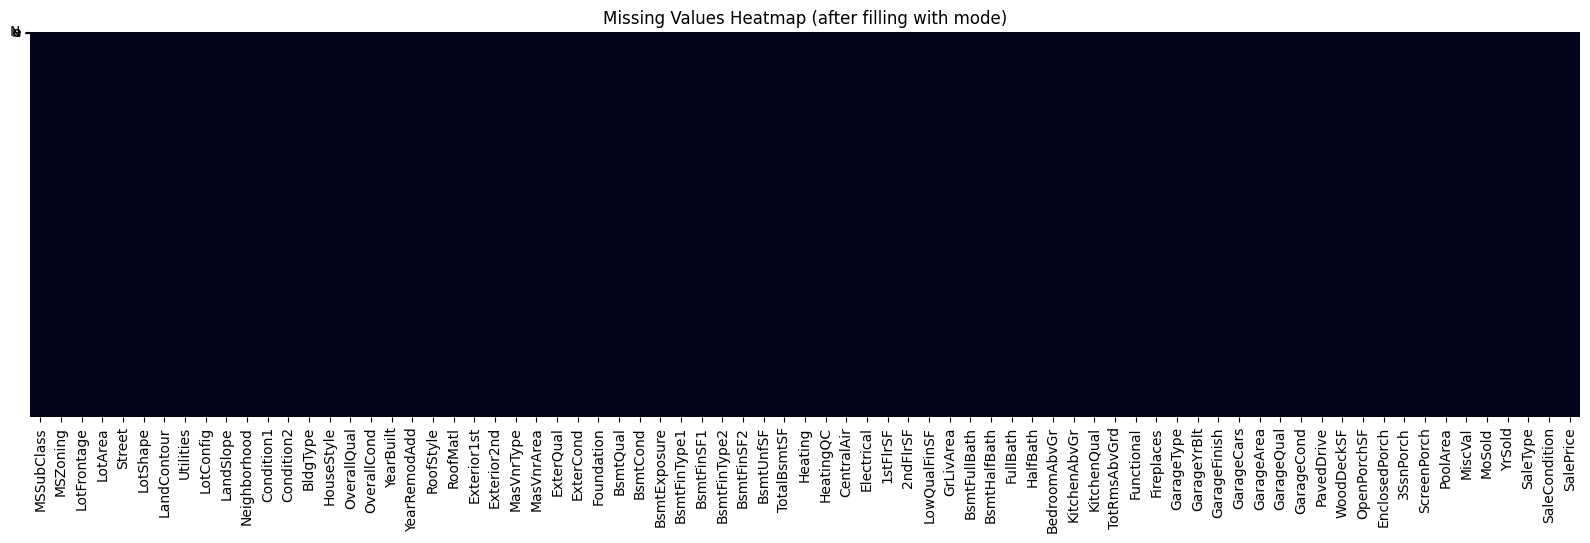

In [10]:
data = data.fillna(value=fill)

plt.figure(figsize=(20,5))

sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap (after filling with mode)")

### Encoding Categorical Data

In [11]:
df = data.drop(["SalePrice"], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [12]:
col_tr = make_column_transformer((OrdinalEncoder(), ord_data),
                                 (OneHotEncoder(), cat_data),
                                 remainder="passthrough")
df_transformed = col_tr.fit_transform(df)

# Convert the resulting array to a dataframe. 
df_1 = pd.DataFrame(df_transformed)
print(df_1.shape)
df_1.head()


(1460, 201)


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,5.0,3.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,3.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,0.0,3.0,3.0,0.0,5.0,7.0,3.0,4.0,2.0,3.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,5.0,0.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,3.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,6.0,0.0,3.0,0.0,6.0,4.0,3.0,4.0,3.0,1.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,0.0,3.0,0.0,7.0,4.0,2.0,4.0,2.0,3.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


### Check for Precence of Outliers 

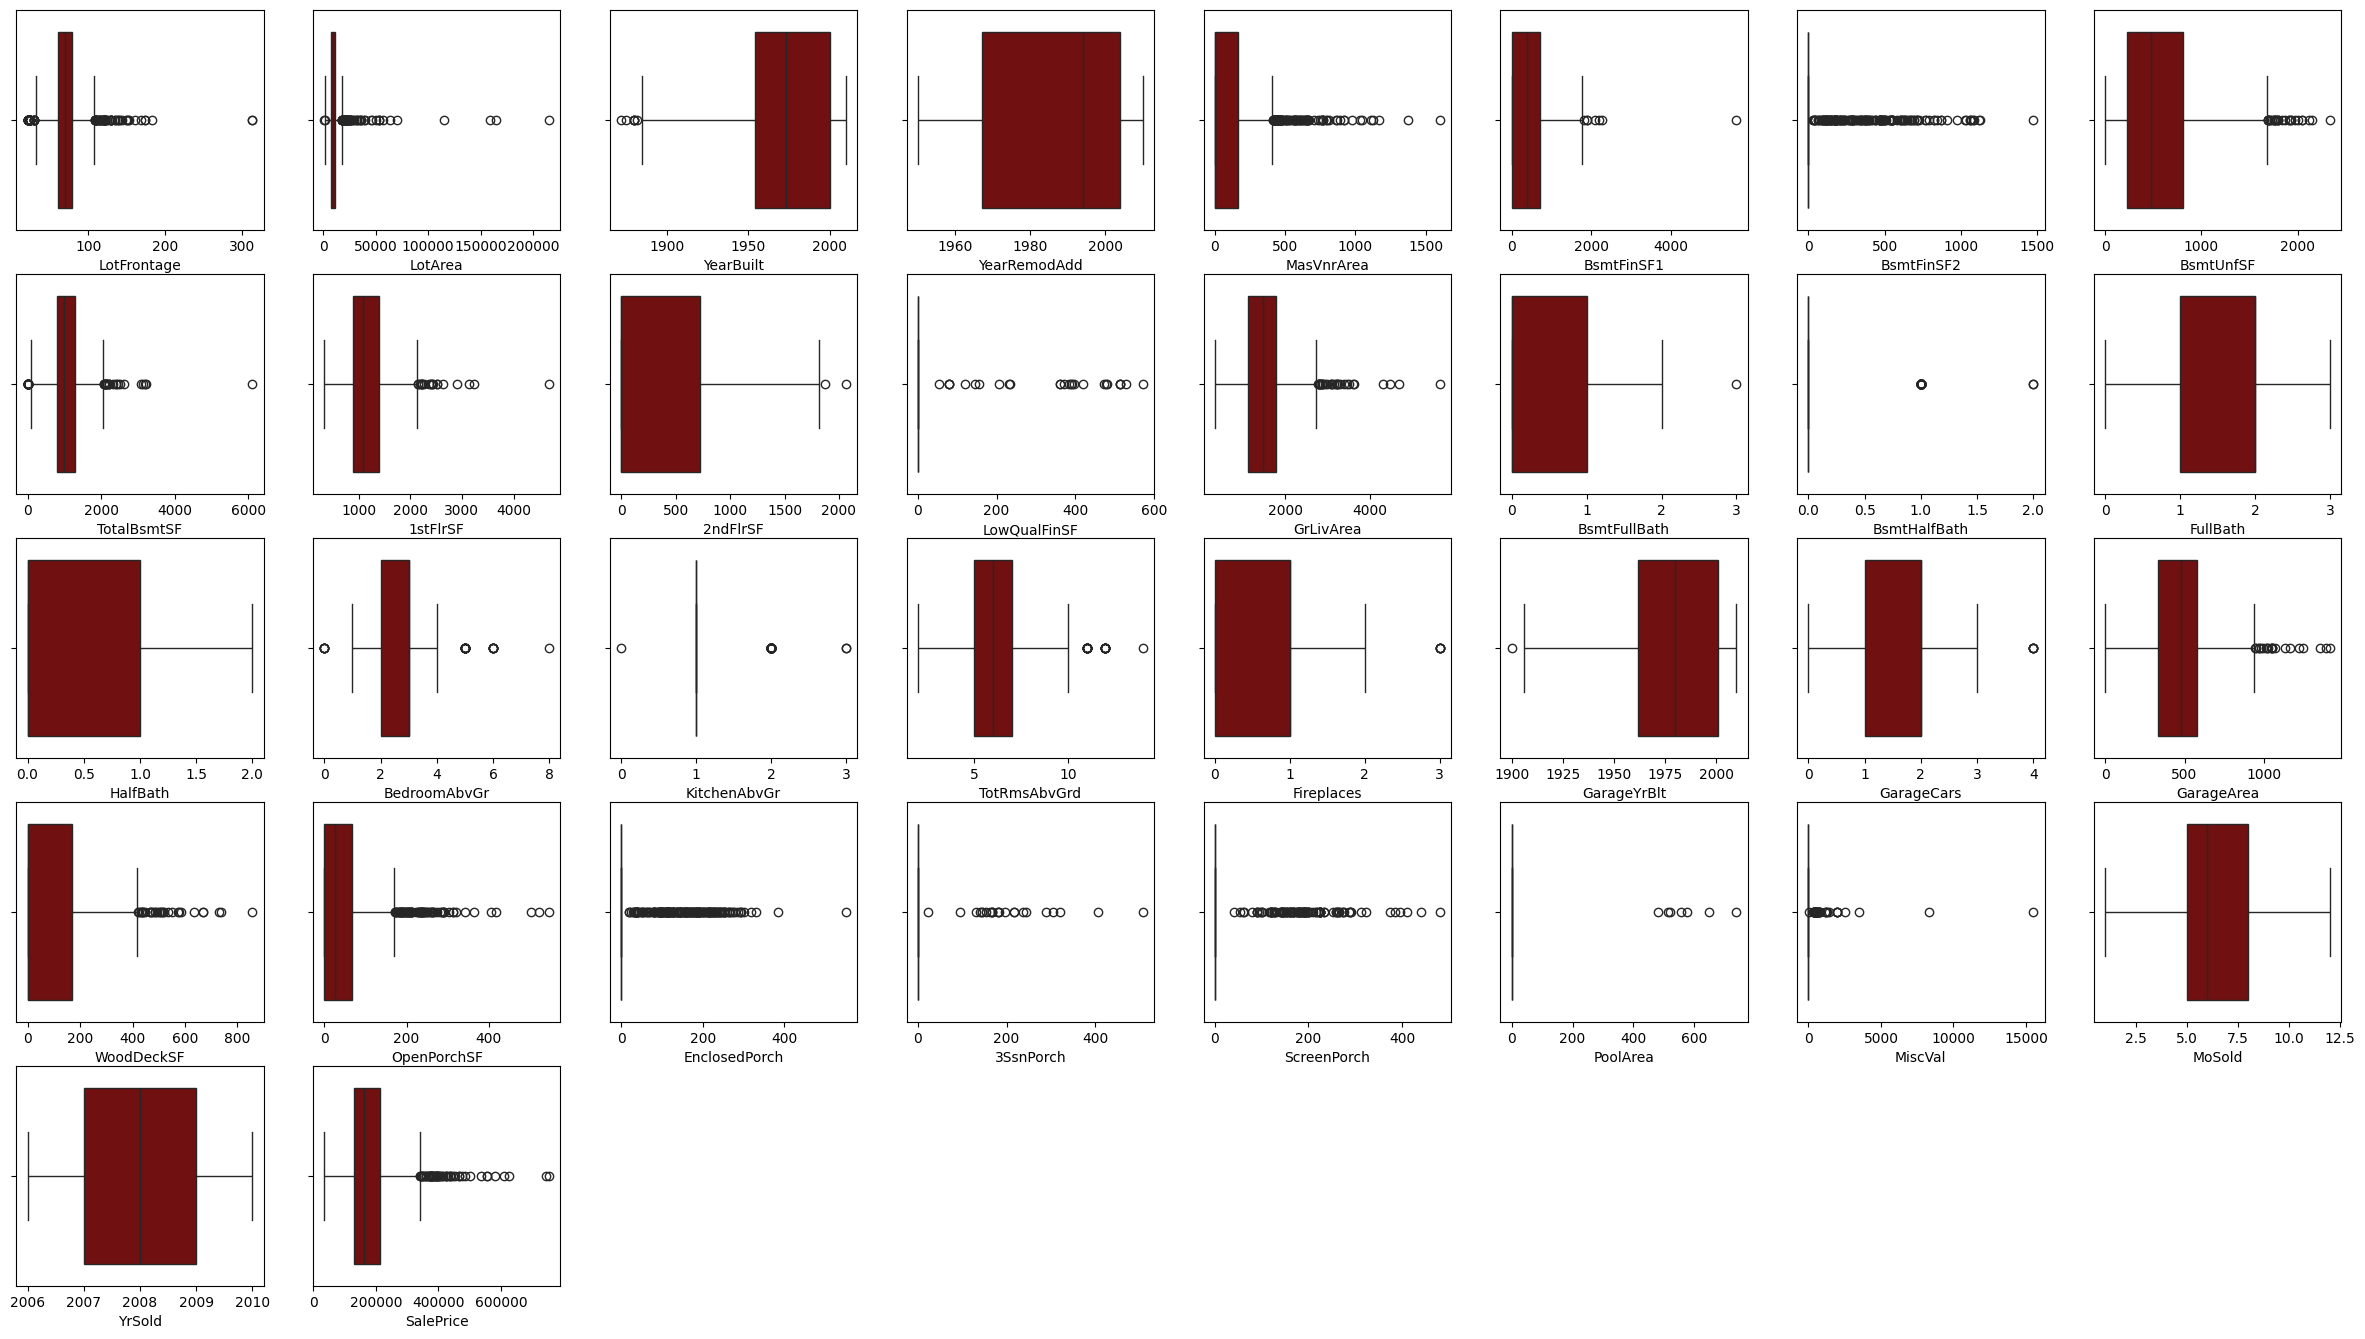

In [58]:
# Univariate analysis of the numerical variables 
fig = plt.figure(figsize=(30,20))
for i,j in zip(num_data,range(len(num_data))): 
    ax=fig.add_subplot(6,8,j+1)
    sns.boxplot(data=data,x=data[i],orient='horizontal',color='maroon')

### Feature Scaling – Standardization

In [63]:
scaler = StandardScaler() 
# scaler = RobustScaler() #With the excessive prescence of outliers in the numerical variables, we can try out a robust scaler 
X = scaler.fit_transform(df_1)

print(X.shape)

(1460, 201)


In [88]:
## Split the Data in Training and Testing Sets - Train Test Split 
y = data.SalePrice
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=.25)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1095, 201) (1095,) (365, 201) (365,)


## Machine Learning Modeling


### Cross-Validated Modeling

1. **Linear Regression Models:** LinearRegression, Lasso, Ridge, *KernelRidge*
2. **Tree-Based Ensemble Regression Models:** RandomForestRegressor, AdaBoostRegressor, BaggingRegressor,
3. **Ensemble Regression Models:** LinearSVR, SVR, NuSVR, *KernelRidge*

In [76]:
pipe = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[0.91803718 0.84533759 0.87537531 0.87070772 0.86828382 0.58638935
 0.8458188  0.84734313 0.78284632 0.86093155] 0.8301070763012574


In [ ]:
pipe = make_pipeline(Lasso(alpha=300))
# pipe = make_pipeline(Lasso(alpha=1.5,max_iter=5000)) # For a Small Alpha, we can increase the iterations, to allow for convergence
scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring="r2")

print(scores, scores.mean())

[0.79425888 0.77060835 0.72235797 0.71490477 0.7664815 ] 0.7537222924062803


In [72]:
pipe = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=100))
scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[0.9312644  0.86259693 0.8871018  0.88190835 0.85801016 0.65020542
 0.85993972 0.84336454 0.80675713 0.87213665] 0.8453285105392745


In [77]:
model = RandomForestRegressor()
scores = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[0.92177841 0.84454518 0.81430333 0.85091103 0.85544478 0.67660151
 0.83261868 0.89084069 0.84203569 0.88534518] 0.8414424490453346


In [ ]:
model = AdaBoostRegressor(n_estimators=100, learning_rate=1, loss="linear")
scores = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[0.80383001 0.82168276 0.83340201 0.81090287 0.81091839 0.81872247
 0.79414215 0.76521545 0.78393964 0.78509148] 0.8027847244268014


In [ ]:
model = BaggingRegressor(n_estimators=100, max_samples=1.0, max_features=1.0)
scores = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[0.86213021 0.86403529 0.8921901  0.83769453 0.83863697 0.86921489
 0.86530443 0.83224304 0.8335452  0.86678656] 0.8561781219393472


In [ ]:
model = LinearSVR(C=1, max_iter=1000).fit(x_train, y_train)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring="r2")

print(scores, scores.mean())

In [ ]:
model = NuSVR(C=1,kernel="linear", degree=1)
scores = cross_val_score(model, x_train, y_train,cv=5, scoring="r2")

print(scores, scores.mean())

In [31]:
model = KernelRidge(alpha=1e-10, kernel="poly", degree=1)
# model = Ridge(alpha=1e-10)
model = make_pipeline(
    TransformedTargetRegressor(regressor=model, 
    func=np.log10, 
    inverse_func=sp.special.exp10))
scores = cross_val_score(model, x_train, y_train, cv=5, scoring="r2")

print(scores, scores.mean())

[0.91507895 0.89336787 0.4831204  0.90633083 0.89911661] 0.8194029326066691


c:\Users\DE737AP\Anaconda3\envs\machinelearning\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.62161e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[0.91446554 0.89243959 0.48367105 0.9065586  0.89946795] 0.8193205471103333


In [ ]:
help(GradientBoostingRegressor)

In [89]:
model= GradientBoostingRegressor(loss='squared_error',
        learning_rate=0.1, n_estimators=1000, 
        subsample=1.0,
        max_depth=4,
        alpha=0.9)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[0.92277297 0.87265715 0.80355673 0.92317054 0.88336472] 0.8811044202206899


Gradient Boosting gives the highest performance however, this is a slighgly slowe algorithm that uses a greedy method of gradiebnt boosting to  seach for the parameters. 

### Hyperparameter Tuning

Focus on **KernelRidge**, **Lasso**, and **Ridge** models based on cross-vaidation accuracy

#### Lasso Regression

In [90]:
alphas = [0.01, 0.05, 0.1, 0.5, 1]
degrees = [1,2]
param_grid = dict(polynomialfeatures__degree = degrees, lasso__alpha = alphas)
print(param_grid)

{'polynomialfeatures__degree': [1, 2], 'lasso__alpha': [0.01, 0.05, 0.1, 0.5, 1]}


In [91]:
model = make_pipeline(PolynomialFeatures(), Lasso())
reg = GridSearchCV(model, param_grid, cv=5, scoring="r2")
reg.fit(X,y)

print(reg.best_score_, reg.best_params_)

0.825618886439796 {'lasso__alpha': 1, 'polynomialfeatures__degree': 1}


(Text(0, 0.5, 'R2 Score'),
 Text(0.5, 0, 'Alpha – Regularization Parameter'),
 <matplotlib.legend.Legend at 0x7f4bdbcc8128>)

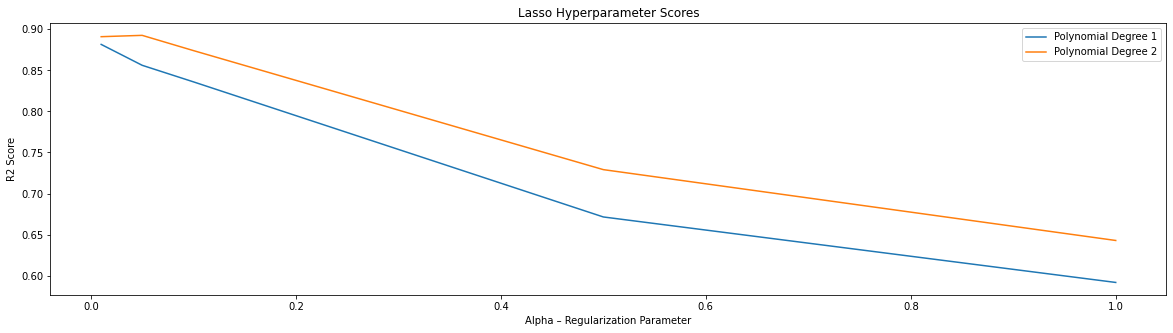

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(reg.cv_results_['param_lasso__alpha'][::2].data, reg.cv_results_['mean_test_score'][::2].data, label="Polynomial Degree 1")
plt.plot(reg.cv_results_['param_lasso__alpha'][1::2].data, reg.cv_results_['mean_test_score'][1::2].data, label="Polynomial Degree 2")

plt.title("Lasso Hyperparameter Scores")
plt.ylabel("R2 Score"), plt.xlabel("Alpha – Regularization Parameter"), plt.legend()

In [ ]:
#focus on the second polynomial and alpha value between 0 and 0.015
param_grid = dict(lasso__alpha = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05])
reg = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso()), param_grid, cv=10, scoring="r2").fit(X,y)
print(reg.best_score_, reg.best_params_)

0.89728824897708 {'lasso__alpha': 0.035}


(Text(0.5, 1.0, 'Lasso Hyperparameter Scores'),
 Text(0, 0.5, 'R2 Score'),
 Text(0.5, 0, 'Alpha'))

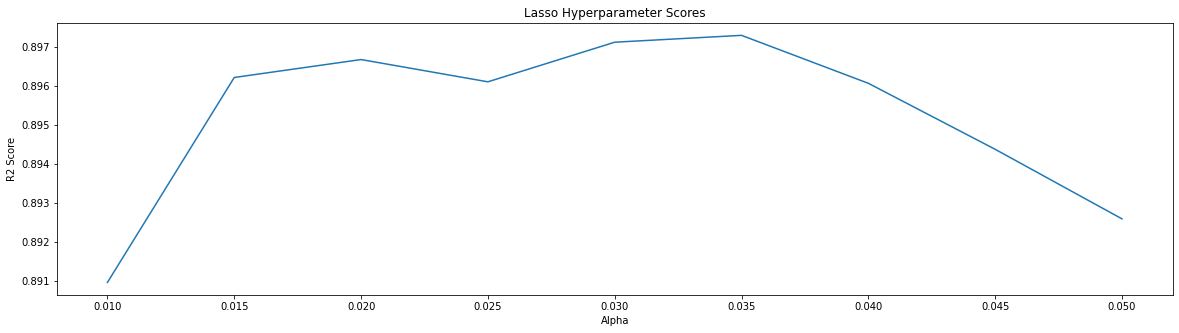

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(reg.cv_results_['param_lasso__alpha'].data, reg.cv_results_['mean_test_score'].data)
plt.title("Lasso Hyperparameter Scores"), plt.ylabel("R2 Score"), plt.xlabel("Alpha – Regularization Parameter")

**Lasso Hyperparameters:** Alpha = 0.035, Polynomial Degree = 2, Other Parameters = Default | **R2 Score = 0.8973**

#### Kernel Ridge Regression

In [ ]:
alphas = [0, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
degrees = [1,2,3,4,5]
param_grid = dict(degree = degrees, alpha = alphas)
print(param_grid)

{'degree': [1, 2, 3, 4, 5], 'alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}


In [ ]:
model = KernelRidge(kernel="poly")
reg = GridSearchCV(model, param_grid, cv=10, scoring="r2")
reg.fit(X,y)

print(reg.best_score_, reg.best_params_)

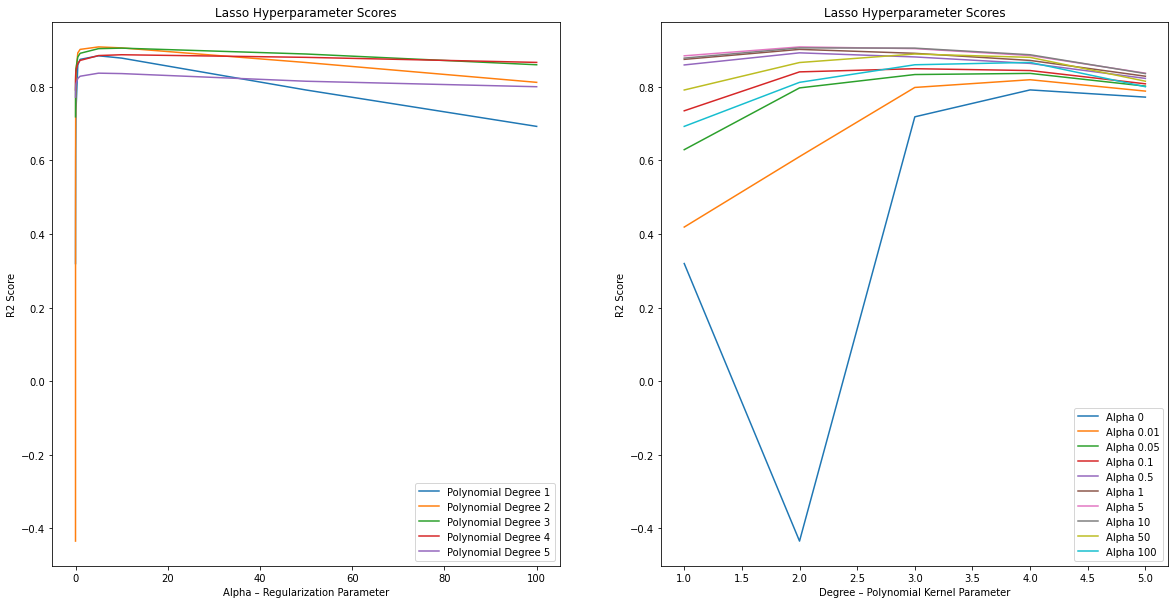

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(reg.cv_results_['param_alpha'][::5].data, reg.cv_results_['mean_test_score'][::5].data, label="Polynomial Degree 1")
plt.plot(reg.cv_results_['param_alpha'][1::5].data, reg.cv_results_['mean_test_score'][1::5].data, label="Polynomial Degree 2")
plt.plot(reg.cv_results_['param_alpha'][2::5].data, reg.cv_results_['mean_test_score'][2::5].data, label="Polynomial Degree 3")
plt.plot(reg.cv_results_['param_alpha'][3::5].data, reg.cv_results_['mean_test_score'][3::5].data, label="Polynomial Degree 4")
plt.plot(reg.cv_results_['param_alpha'][4::5].data, reg.cv_results_['mean_test_score'][4::5].data, label="Polynomial Degree 5")
plt.title("Kernel Ridge Hyperparameter Scores")
plt.xlabel("Alpha – Regularization Parameter")
plt.ylabel("R2 Score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(reg.cv_results_['param_degree'][:5].data, reg.cv_results_['mean_test_score'][:5].data, label="Alpha 0")
plt.plot(reg.cv_results_['param_degree'][5:10].data, reg.cv_results_['mean_test_score'][5:10].data, label="Alpha 0.01")
plt.plot(reg.cv_results_['param_degree'][10:15].data, reg.cv_results_['mean_test_score'][10:15].data, label="Alpha 0.05")
plt.plot(reg.cv_results_['param_degree'][15:20].data, reg.cv_results_['mean_test_score'][15:20].data, label="Alpha 0.1")
plt.plot(reg.cv_results_['param_degree'][20:25].data, reg.cv_results_['mean_test_score'][20:25].data, label="Alpha 0.5")
plt.plot(reg.cv_results_['param_degree'][25:30].data, reg.cv_results_['mean_test_score'][25:30].data, label="Alpha 1")
plt.plot(reg.cv_results_['param_degree'][30:35].data, reg.cv_results_['mean_test_score'][30:35].data, label="Alpha 5")
plt.plot(reg.cv_results_['param_degree'][35:40].data, reg.cv_results_['mean_test_score'][35:40].data, label="Alpha 10")
plt.plot(reg.cv_results_['param_degree'][40:45].data, reg.cv_results_['mean_test_score'][40:45].data, label="Alpha 50")
plt.plot(reg.cv_results_['param_degree'][45:].data, reg.cv_results_['mean_test_score'][45:].data, label="Alpha 100")
plt.title("Kernerl. Ridge Hyperparameter Scores")
plt.xlabel("Degree – Polynomial Kernel Parameter")
plt.ylabel("R2 Score")
plt.legend()

plt.show()

In [ ]:
#focus on the second and third polynomials and alpha value between 0 and 10
param_grid = dict(alpha = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], degree=[2,3])
reg = GridSearchCV(KernelRidge(kernel="poly"), param_grid, cv=10, scoring="r2").fit(X,y)
print(reg.best_score_, reg.best_params_)

0.9085020030706815 {'alpha': 4, 'degree': 2}


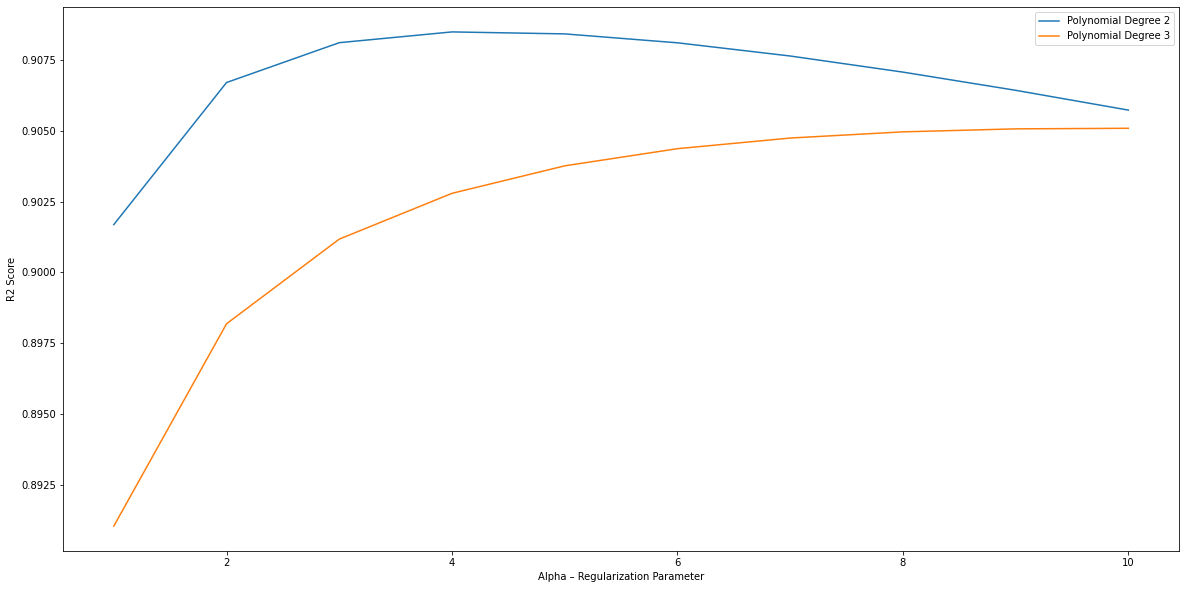

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(reg.cv_results_['param_alpha'][::2].data, reg.cv_results_['mean_test_score'][::2].data, label="Polynomial Degree 2")
plt.plot(reg.cv_results_['param_alpha'][1::2].data, reg.cv_results_['mean_test_score'][1::2].data, label="Polynomial Degree 3")

plt.xlabel("Alpha – Regularization Parameter"), plt.ylabel("R2 Score"), plt.legend()
plt.show()

**Kernel Ridge Hyperparameters:** Alpha = 4, Polynomial Degree = 2, Other Parameters = Default | **R2 Score = 0.9085**

#### Ridge Regression

In [ ]:
alphas = [10, 50, 100, 500, 1000]
degrees = [1,2]
param_grid = dict(polynomialfeatures__degree = degrees, ridge__alpha = alphas)
print(param_grid)

{'polynomialfeatures__degree': [1, 2], 'ridge__alpha': [10, 50, 100, 500, 1000]}


In [ ]:
model = make_pipeline(PolynomialFeatures(), Ridge())
reg = GridSearchCV(model, param_grid, cv=10, scoring="r2")
reg.fit(X,y)

print(reg.best_score_, reg.best_params_)

0.8842335482768059 {'polynomialfeatures__degree': 1, 'ridge__alpha': 500}


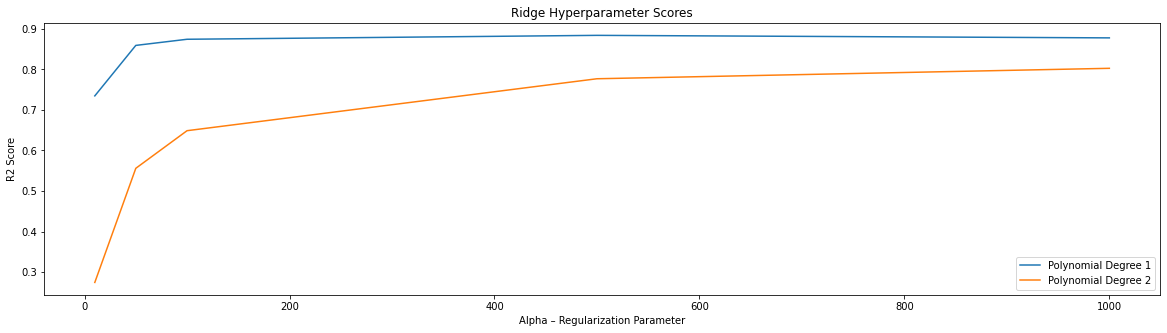

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(reg.cv_results_['param_ridge__alpha'][:5].data, reg.cv_results_['mean_test_score'][:5].data, label="Polynomial Degree 1")
plt.plot(reg.cv_results_['param_ridge__alpha'][5:].data, reg.cv_results_['mean_test_score'][5:].data, label="Polynomial Degree 2")

plt.title("Ridge Hyperparameter Scores")
plt.ylabel("R2 Score"), plt.xlabel("Alpha – Regularization Parameter"), plt.legend()
plt.show()

In [ ]:
#focus on the first polynomial and alpha values between 100 and 1000
param_grid = dict(ridge__alpha = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
reg = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1), Ridge()), param_grid, cv=10, scoring="r2").fit(X,y)
print(reg.best_score_, reg.best_params_)

0.8845319536041243 {'ridge__alpha': 400}


(Text(0.5, 1.0, 'Ridge Hyperparameter Scores'),
 Text(0, 0.5, 'R2 Score'),
 Text(0.5, 0, 'Alpha – Regularization Parameter'))

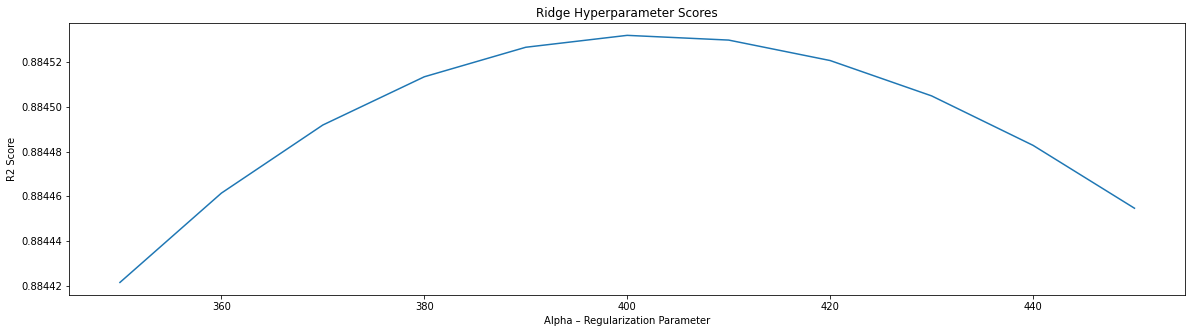

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(reg.cv_results_['param_ridge__alpha'].data, reg.cv_results_['mean_test_score'].data)
plt.title("Ridge Hyperparameter Scores"), plt.ylabel("R2 Score"), plt.xlabel("Alpha – Regularization Parameter")

**Ridge Hyperparameters:** Alpha = 400, Polynomial Degree = 1, Other Parameters = Default | ***R2 Score = 0.88453*** 

### Model Evaluation
Based on hyperparameter tuning results, **Kernel Ridge** is the optimal model given its ***high R2 score***.

#### Model Score Optimization 

Text(0.5, 0, 'Alpha')

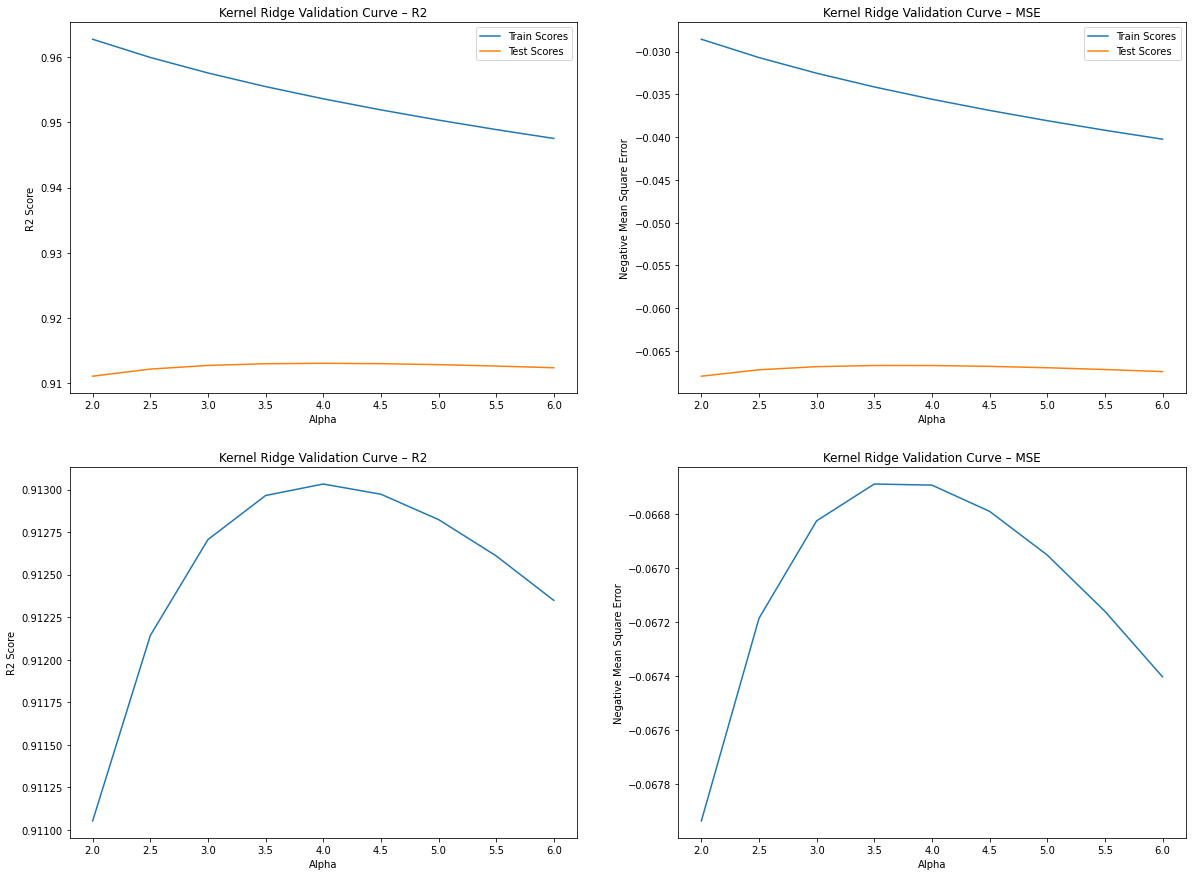

In [ ]:
alpha_range = [2,2.5,3,3.5,4,4.5,5,5.5,6]
r2_train, r2_test = validation_curve(KernelRidge(kernel="poly", degree=2), X, y, param_name="alpha", param_range = alpha_range, cv=10, scoring="r2")
mse_train, mse_test = validation_curve(KernelRidge(kernel="poly", degree=2), X, y, param_name="alpha", param_range = alpha_range, cv=10, scoring="neg_mean_squared_error")

plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
plt.plot(alpha_range, r2_train.mean(axis=1), label="Train Scores")
plt.plot(alpha_range, r2_test.mean(axis=1), label="Test Scores")
plt.xlabel("Alpha"), plt.ylabel("R2 Score"), plt.legend()
plt.title("Kernel Ridge Validation Curve – R2")

plt.subplot(2, 2, 2)
plt.plot(alpha_range, mse_train.mean(axis=1), label="Train Scores")
plt.plot(alpha_range, mse_test.mean(axis=1), label="Test Scores")
plt.xlabel("Alpha"), plt.ylabel("Negative Mean Square Error"), plt.legend()
plt.title("Kernel Ridge Validation Curve – MSE")

plt.subplot(2, 2, 3)
plt.plot(alpha_range, r2_test.mean(axis=1))
plt.title("Kernel Ridge Validation Curve – R2")
plt.ylabel("R2 Score")
plt.xlabel("Alpha")

plt.subplot(2, 2, 4)
plt.plot(alpha_range, mse_test.mean(axis=1))
plt.title("Kernel Ridge Validation Curve – MSE")
plt.ylabel("Negative Mean Square Error")
plt.xlabel("Alpha")

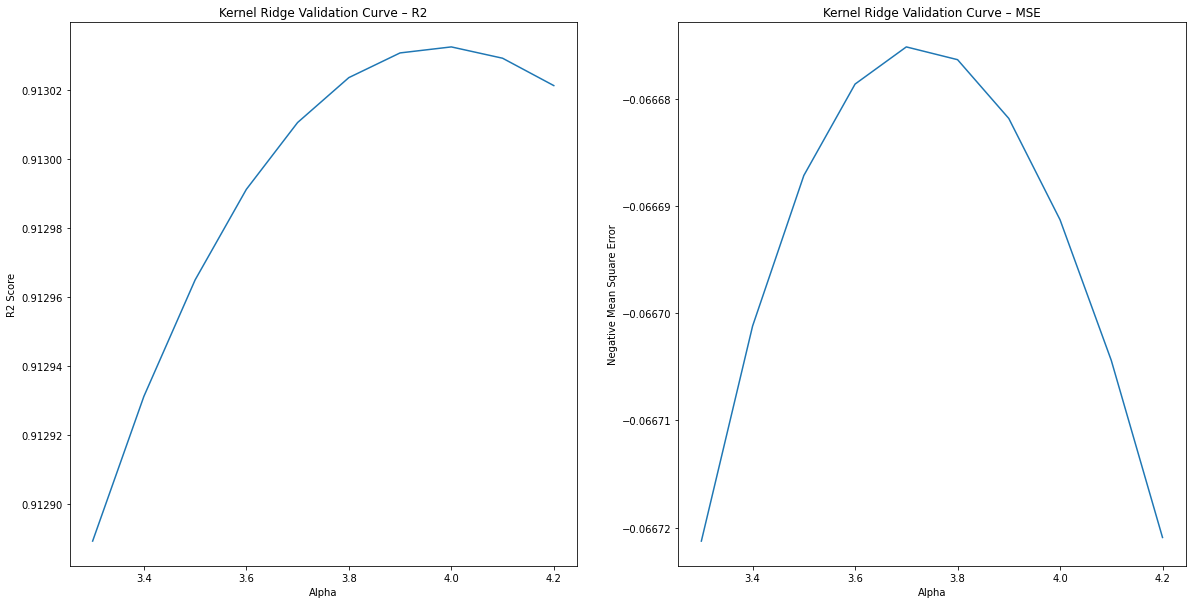

In [ ]:
alpha_range = [3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2]
r2_train, r2_test = validation_curve(KernelRidge(kernel="poly", degree=2), X, y, param_name="alpha", param_range = alpha_range, cv=10, scoring="r2")
mse_train, mse_test = validation_curve(KernelRidge(kernel="poly", degree=2), X, y, param_name="alpha", param_range = alpha_range, cv=10, scoring="neg_mean_squared_error")

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(alpha_range, r2_test.mean(axis=1))
plt.title("Kernel Ridge Validation Curve – R2")
plt.ylabel("R2 Score")
plt.xlabel("Alpha")

plt.subplot(1, 2, 2)
plt.plot(alpha_range, mse_test.mean(axis=1))
plt.title("Kernel Ridge Validation Curve – MSE")
plt.ylabel("Negative Mean Square Error")
plt.xlabel("Alpha")

plt.show()

R2 Score peaks at alpha 4.0, while means square error is minimal at alpha 3.7. We'll choose the midpoint between the two alphas for final modeling. Thus, **optimal alpha – 3.85**

#### Prediction Visualization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1109, 100) (278, 100) (1109,) (278,)


In [ ]:
model = KernelRidge(kernel="poly", alpha=3.85, degree=2).fit(X_train, y_train)
y_pred = model.predict((X_test))

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.06974733118318385
0.9247273248093899


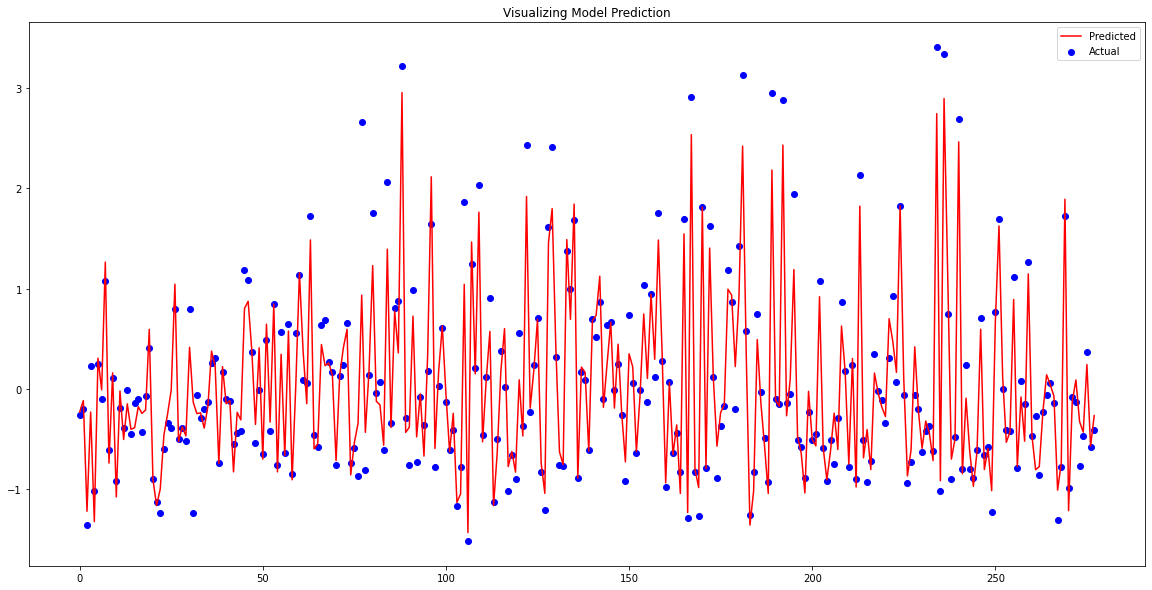

In [ ]:
x = np.arange(len(y_pred))
plt.figure(figsize=(20,10))

plt.plot(x, y_pred, label="Predicted", color="Red")
plt.scatter(x, y_test, label="Actual", color="Blue")
plt.title("Visualizing Model Prediction")
plt.legend()

plt.show()

#### Final Model Export

In [ ]:
final_model = KernelRidge(kernel="poly", alpha=3.85, degree=2).fit(X, y)

pickle.dump(final_model, open("boston_house_model", 'wb')) #save regression model
pickle.dump(scaler, open("boston_house_scaler", 'wb')) #save standard scaler
pickle.dump(pca, open("boston_house_pca", 'wb')) #save pca model

#Note that the data preparation pipeline also involved Missing Values Imputation and Categorical Columns Transformation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='boston_house_model'>
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='boston_house_scaler'>
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='boston_house_pca'>
  """
